In [23]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [30]:
# Look at the first data of Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2505ca8f100>,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.

From the csv provided, the most recent date in the data set is 2017-08-23

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

Query_date = dt.date(2017, 8, 23) + relativedelta(months=-12)

print(Query_date)


2016-08-23


In [41]:
# Perform a query to retrieve the data and precipitation scores

Months = session.query(Measurement.date,func.avg(Measurement.prcp)).\
    filter(Measurement.date>=query_date).\
    group_by(Measurement.date).all()

Months

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column

Months_df = pd.DataFrame(date_prcp, columns = ["Date", "Precipitation"])
Months_df.Date = pd.to_datetime(Months_df.Date)
Months_df.head()

Months_df.set_index("Date", inplace =True)
Months_df.head()

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


In [49]:
# Sort the dataframe by date

Months_df.sort_values("Date")
Months_df.head()

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


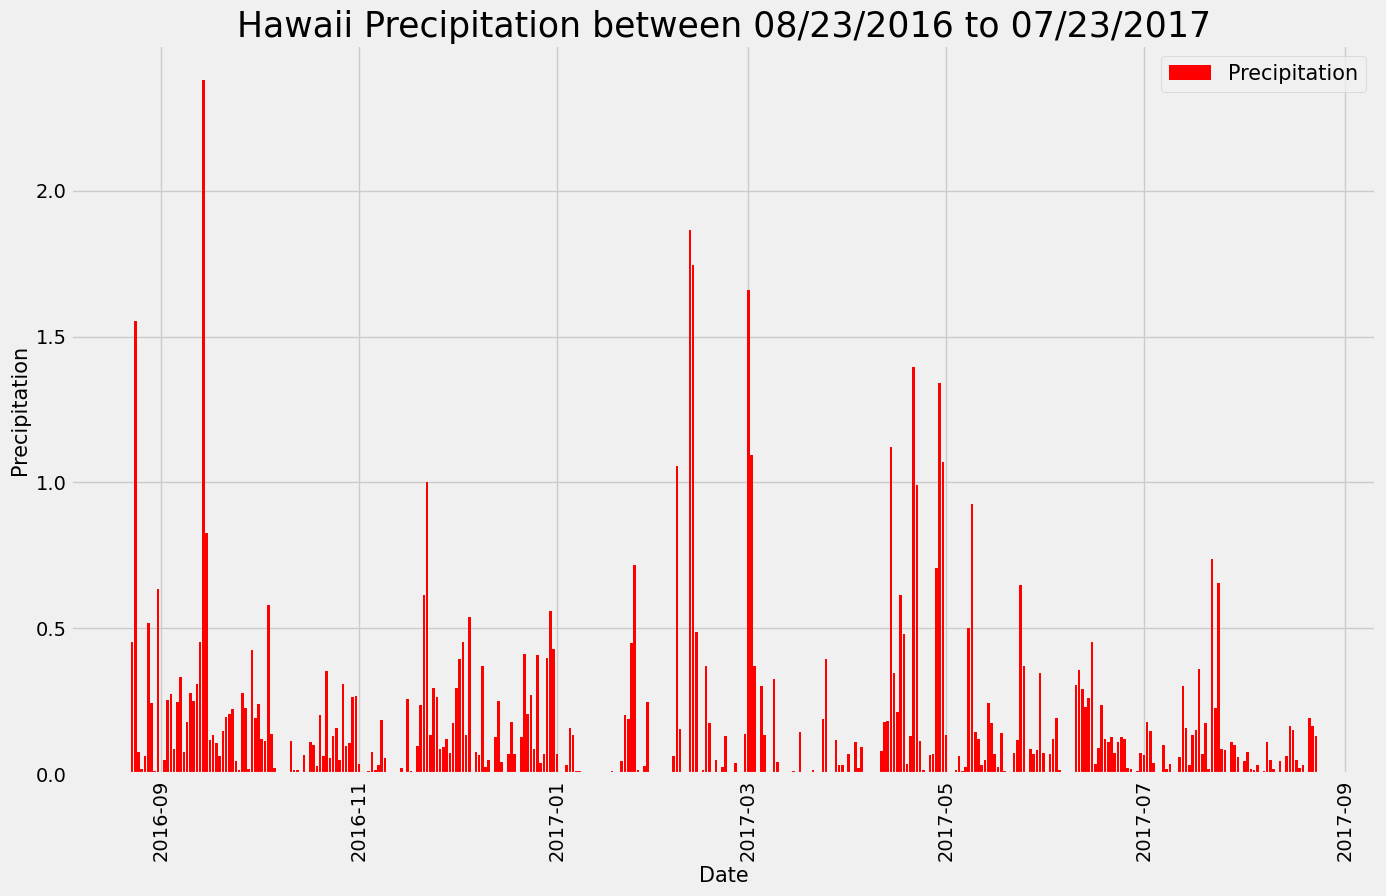

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(15, 9))
plt.bar(Months_df.index,Months_df["Precipitation"], color="r")
plt.title("Hawaii Precipitation between 08/23/2016 to 07/23/2017", fontsize=25)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Precipitation", fontsize=15)
plt.legend(['Precipitation'],fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Months_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [73]:
# Look at the first data of Station
first_row_2 = session.query(Station).first()
first_row_2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2505e42c8e0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [75]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations


9

In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Station.station, Station.name,func.count(Station.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).order_by(func.count(Station.station).desc()).all()

active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').scalar()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').scalar()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').scalar()

print(f"The lowest temperature of the most active station: {lowest_temp}")
print(f"The highest temperature of the most active station: {highest_temp}")
print(f"The average temperature of the most active station: {avg_temp}")

The lowest temperature of the most active station: 54.0
The highest temperature of the most active station: 85.0
The average temperature of the most active station: 71.66378066378067


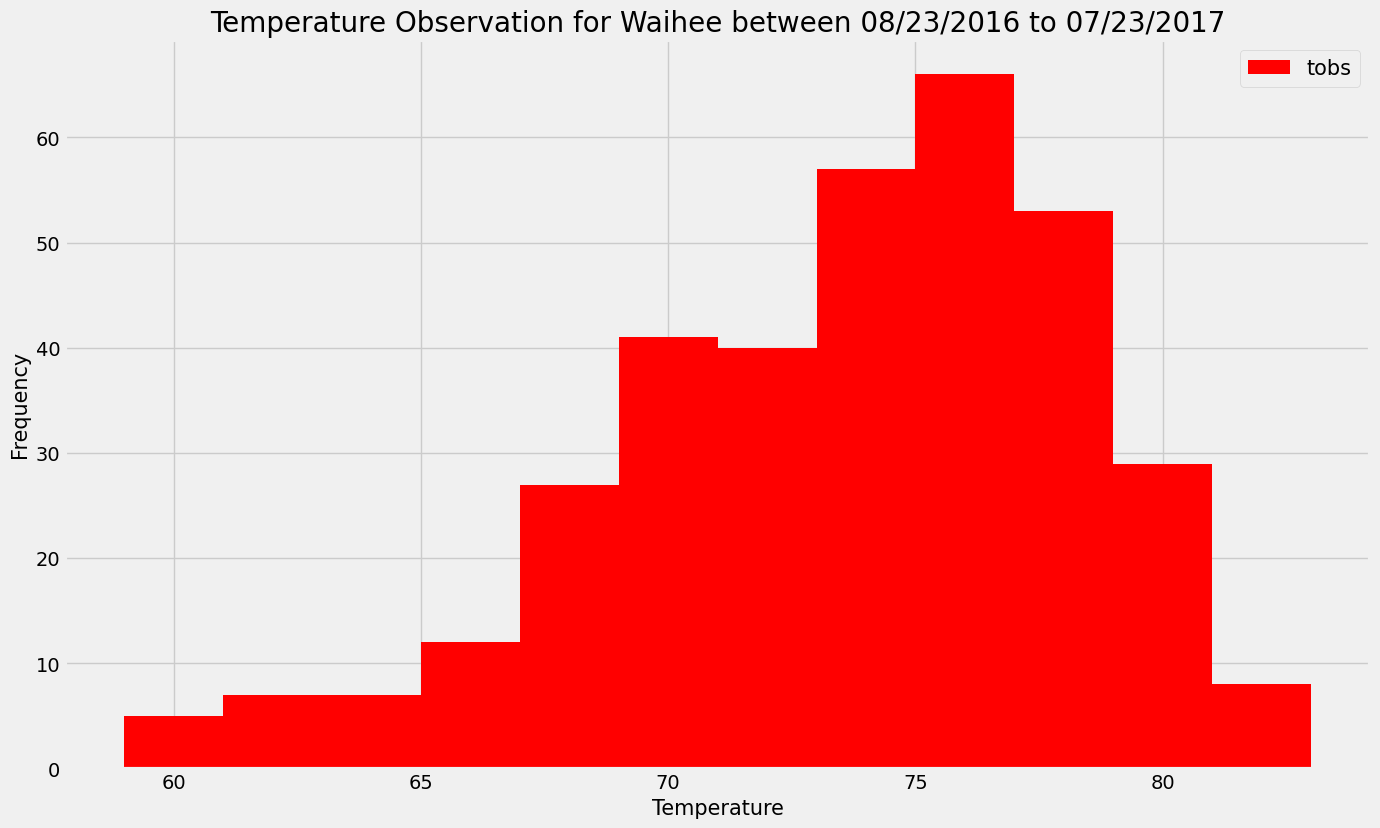

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp_observation = session.query(Measurement.tobs).\
    filter(Measurement.date>="2016-08-23").\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').all()

observation = [t[0] for t in temp_observation]

fig1, ax1 = plt.subplots(figsize=(15, 9))
plt.hist(observation, 12, label = 'tobs', color="r")
plt.title("Temperature Observation for Waihee between 08/23/2016 to 07/23/2017", fontsize = 20)
plt.xlabel("Temperature",fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Close session

In [91]:
# Close Session
session.close()